In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv', header=None)
data.columns = ['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            345 non-null    object
 1   island             345 non-null    object
 2   bill_length_mm     343 non-null    object
 3   bill_depth_mm      343 non-null    object
 4   flipper_length_mm  343 non-null    object
 5   body_mass_g        343 non-null    object
 6   sex                334 non-null    object
dtypes: object(7)
memory usage: 19.0+ KB


In [4]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.1,18.7,181,3750,MALE
2,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
3,Adelie,Torgersen,40.3,18,195,3250,FEMALE
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv',header=0)
data.variables = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
from pandas.api.types import is_numeric_dtype
for col in data.variables:
  if is_numeric_dtype(data[col]):
    print('%s:'%(col))
    print('\t Mean = %.2f' % data[col].mean())
    print('\t Standard Deviation = %.2f' % data[col].std())
    print('\t Minimum = %.2f' % data[col].min())
    print('\t Maximum = %.2f' % data[col].max())

bill_length_mm:
	 Mean = 43.92
	 Standard Deviation = 5.46
	 Minimum = 32.10
	 Maximum = 59.60
bill_depth_mm:
	 Mean = 17.15
	 Standard Deviation = 1.97
	 Minimum = 13.10
	 Maximum = 21.50
flipper_length_mm:
	 Mean = 200.92
	 Standard Deviation = 14.06
	 Minimum = 172.00
	 Maximum = 231.00
body_mass_g:
	 Mean = 4201.75
	 Standard Deviation = 801.95
	 Minimum = 2700.00
	 Maximum = 6300.00


In [9]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [10]:
data.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [11]:
print('Covariance:')
data.cov()

Covariance:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [12]:
print("Correlation")
data.corr()

Correlation


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


**Data Visualization**

**Histogram**

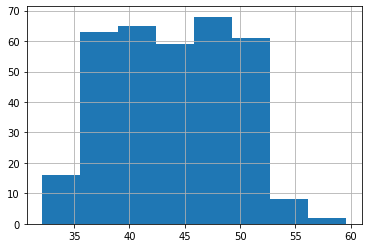

In [13]:
data['bill_length_mm'].hist(bins=8)

**BoxPlot**

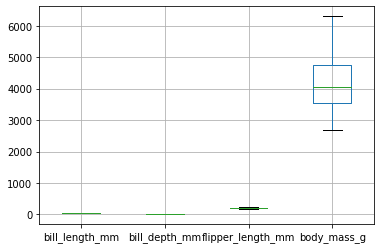

In [14]:
data.boxplot()

**Scatter plot**

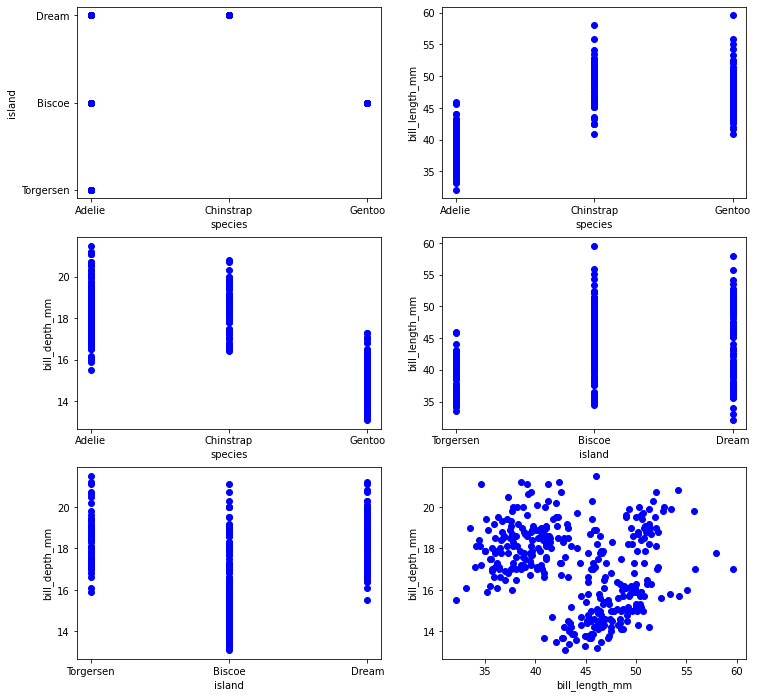

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index= 0 
for i in range(3):
  for j in range(i+1,4):
    ax1 = int(index/2)
    ax2 = index % 2
    axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color= 'blue')
    axes[ax1][ax2].set_xlabel(data.columns[i])
    axes[ax1][ax2].set_ylabel(data.columns[j])
    index = index + 1